In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate) # Количество сэмплов

# Белый шум

In [47]:
white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.27881834 0.73515276 0.16204167 ... 0.09025096 0.37453646 0.93606384]


## Визуализация

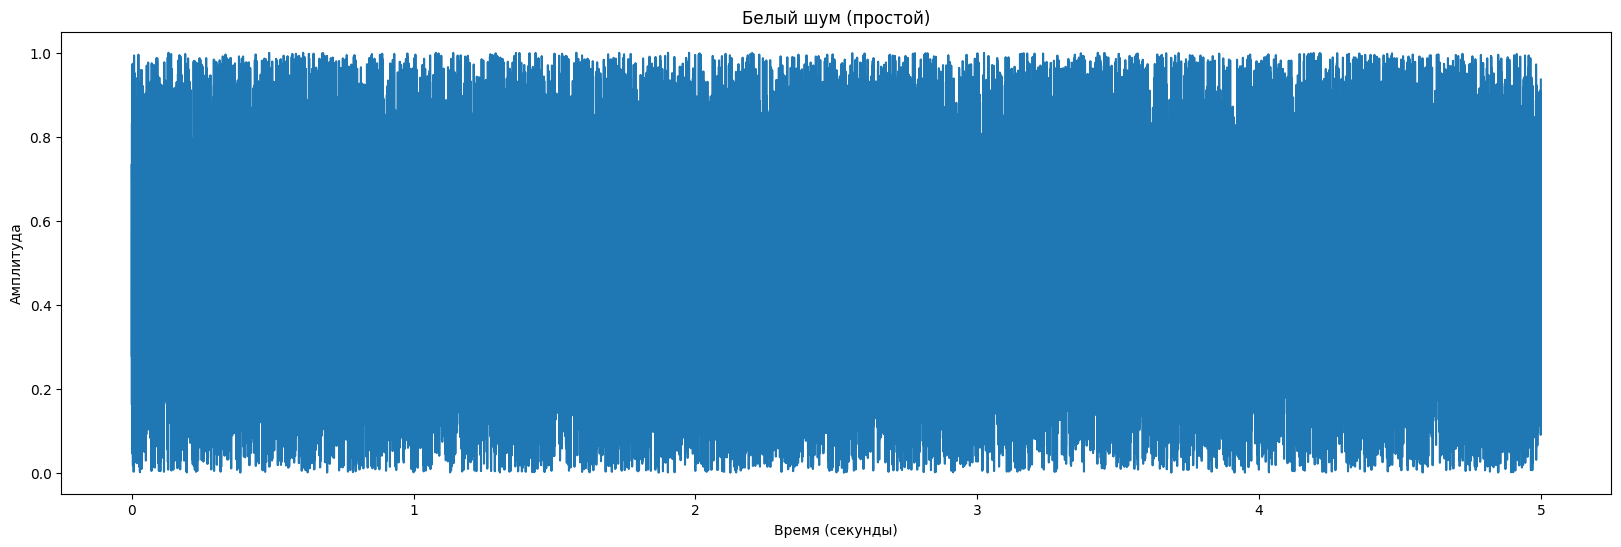

In [48]:
time_axis = np.linspace(0, duration, len(white_noise_simple))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, white_noise_simple)

plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

## Аудио

In [4]:
sd.play(white_noise_simple, sample_rate)
sd.wait()

# Гауссовский белый шум

In [49]:
# loc - медиана
# scale - стандартная девиация

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

print(white_noise_g)

[-0.04538557 -0.79494404  0.72760481 ...  0.91578807  0.30216826
 -1.75181457]


## Визуализация

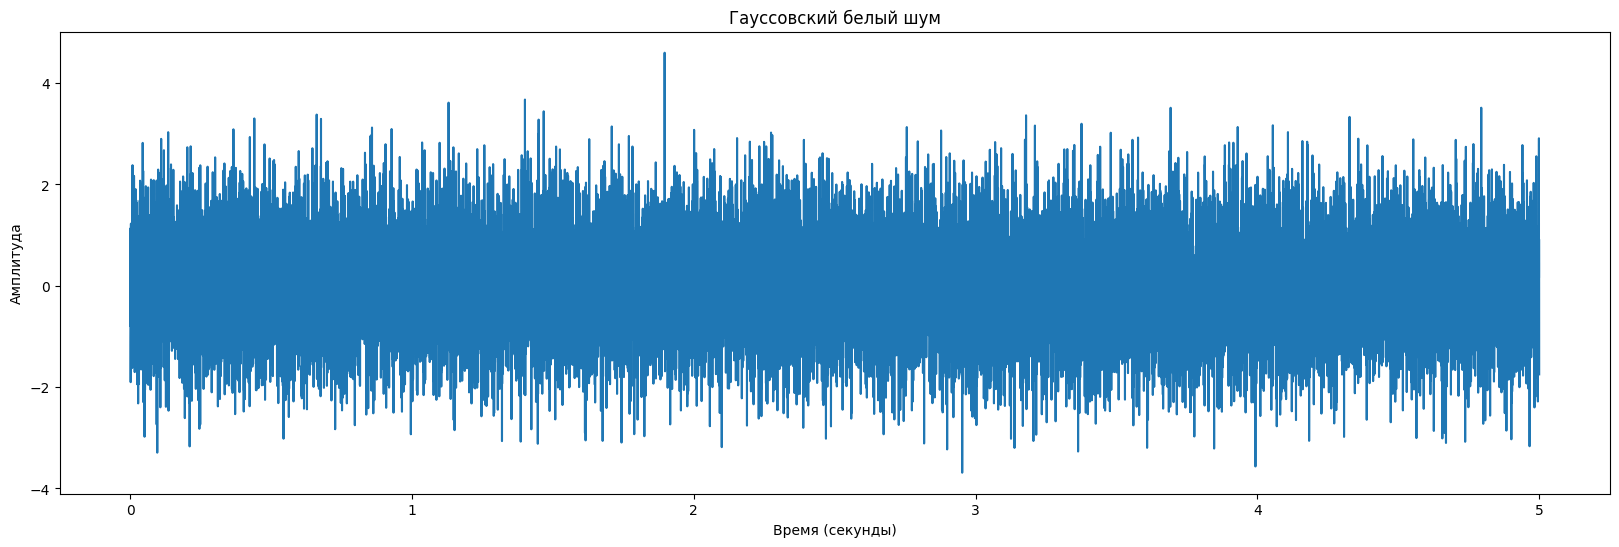

In [50]:
time_axis = np.linspace(0, duration, len(white_noise_g))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, white_noise_g)

plt.title('Гауссовский белый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

## Аудио

In [ ]:
sd.play(white_noise_g, sample_rate)
sd.wait()

# Коричневый шум

In [51]:
cumsum = np.cumsum(white_noise_g)  # кумулятивная сумма
brown_noise = cumsum - np.mean(cumsum)  # обнуляем медианное значение
scale_coeff =  np.max(np.abs(brown_noise))   # коэффициент для масшабирования, чтобы весь ряд находился между -1 и 1

brown_noise = brown_noise / scale_coeff  # Нормализация к [-1, 1] . Каждый элемент ряда делится на масштабирующий коэффициент

print(brown_noise)
print(white_noise_g)

[-0.02309308 -0.02866901 -0.02356541 ... -0.89458113 -0.89246165
 -0.90474931]
[-0.04538557 -0.79494404  0.72760481 ...  0.91578807  0.30216826
 -1.75181457]


## Визуализация

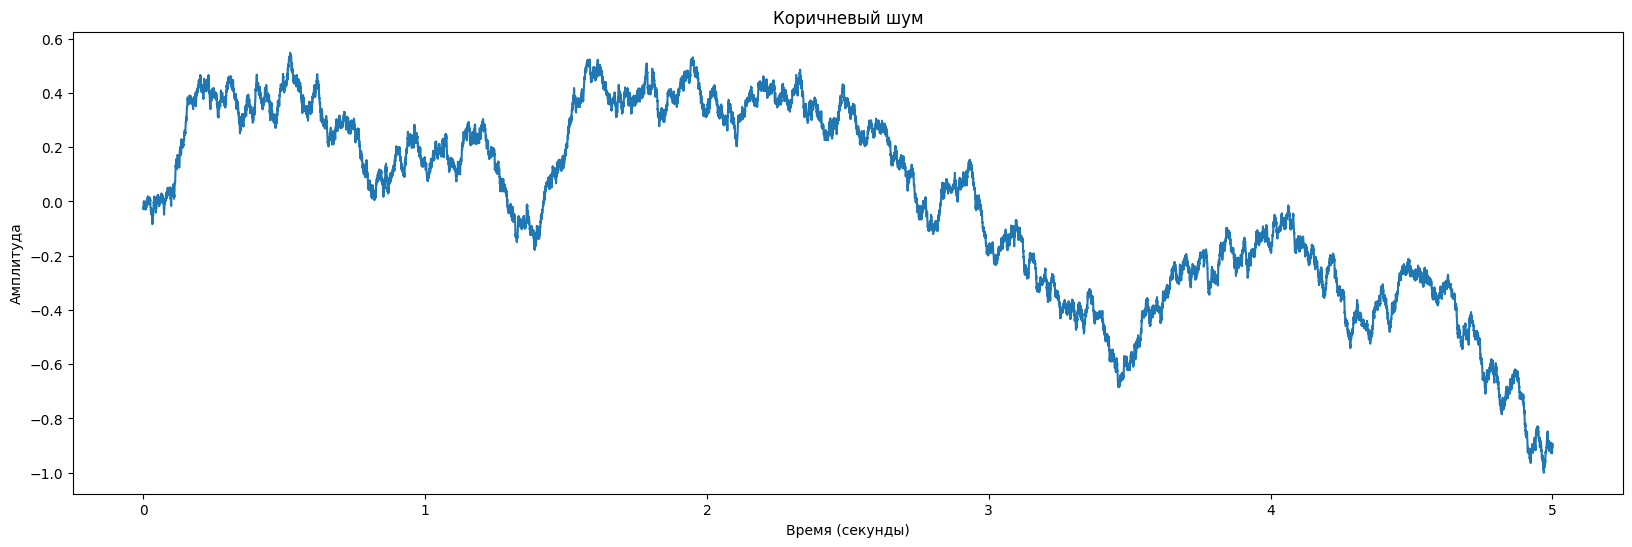

In [52]:
time_axis = np.linspace(0, duration, len(brown_noise))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, brown_noise)

plt.title('Коричневый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

## Аудио

In [ ]:
sd.play(brown_noise, sample_rate)
sd.wait()

# Розовый шум

In [53]:
spectrum = np.fft.rfft(white_noise_g)
pink_noise = np.real(spectrum) / np.sqrt(np.arange(1, len(spectrum) + 1))
pink_signal = np.fft.irfft(pink_noise, n=num_samples)
pink_signal /= np.max(np.abs(pink_signal))
print(pink_signal)

[-0.03842112 -0.17373898  0.14433274 ...  0.23107147  0.14433274
 -0.17373898]


## Визуализация

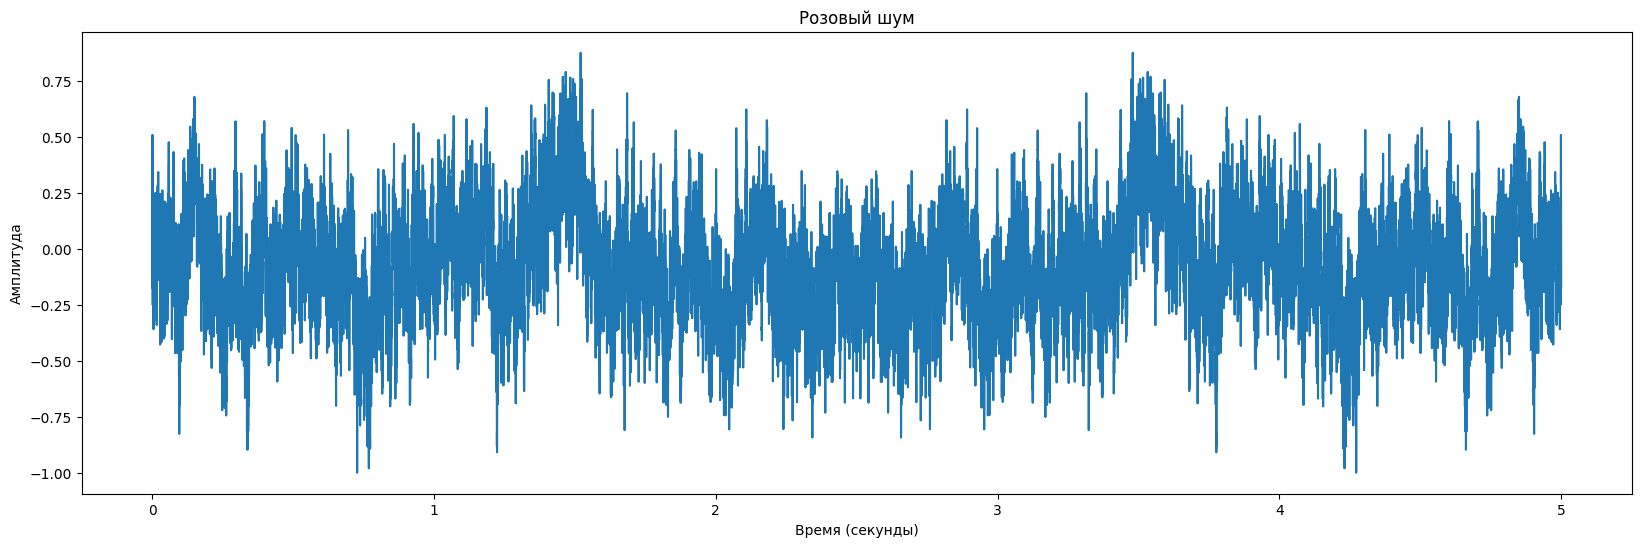

In [54]:
time_axis = np.linspace(0, duration, len(pink_signal))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, pink_signal)

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

## Аудио

In [ ]:
sd.play(pink_signal, sample_rate)
sd.wait()

# Черный шум

In [55]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]


1.380649e-23
6.62607015e-34
299792458.0


## Визуализация

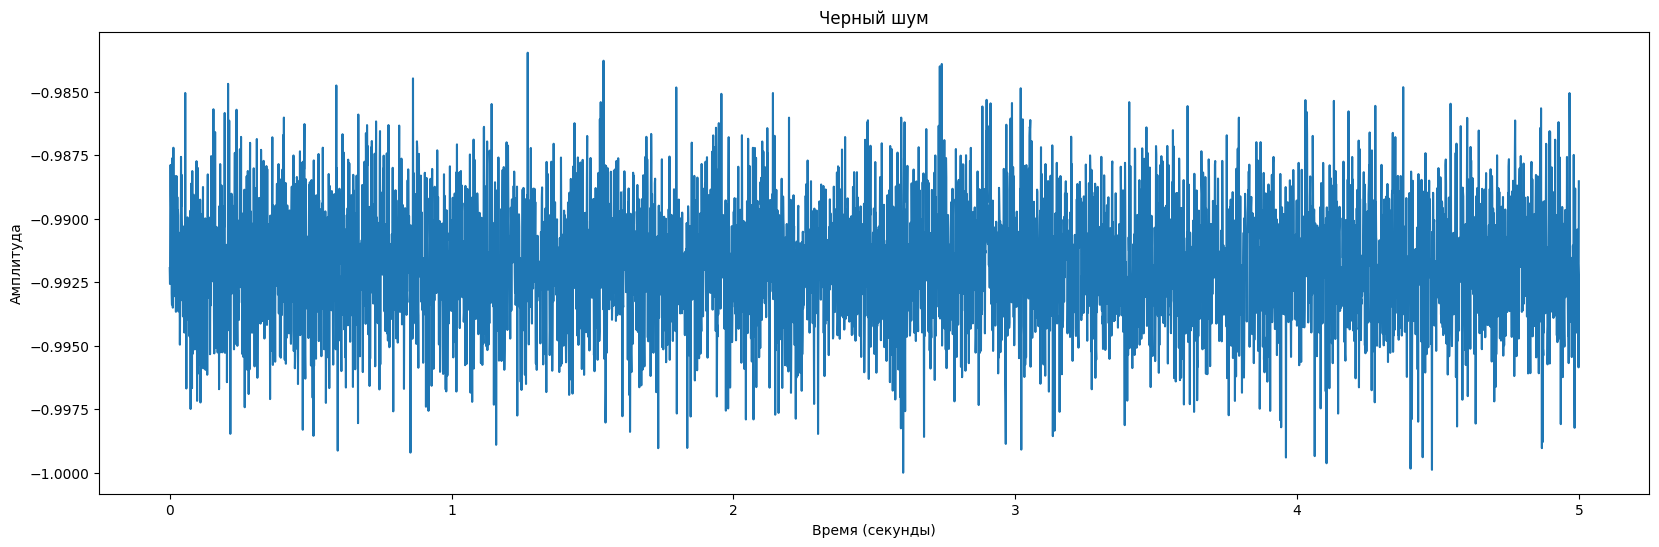

In [56]:
time_axis = np.linspace(0, duration, len(black_noise))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, black_noise)

plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

# Генерация временного ряда

In [57]:
white_noise_base = np.random.normal(0,1,size=num_samples)  # Создаем белый шум

time_points = np.linspace(0, duration, num_samples)  # Создаем равномерные временные точки от 0 до 5 секунд
values = np.cos(time_points * np.pi) # Dычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_base # Зашумляем сигнал

## Визуализация

/var/folders/p5/lrpx83fd6vbch0znz3q6vz4c0000gn/T/ipykernel_12813/1178121330.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


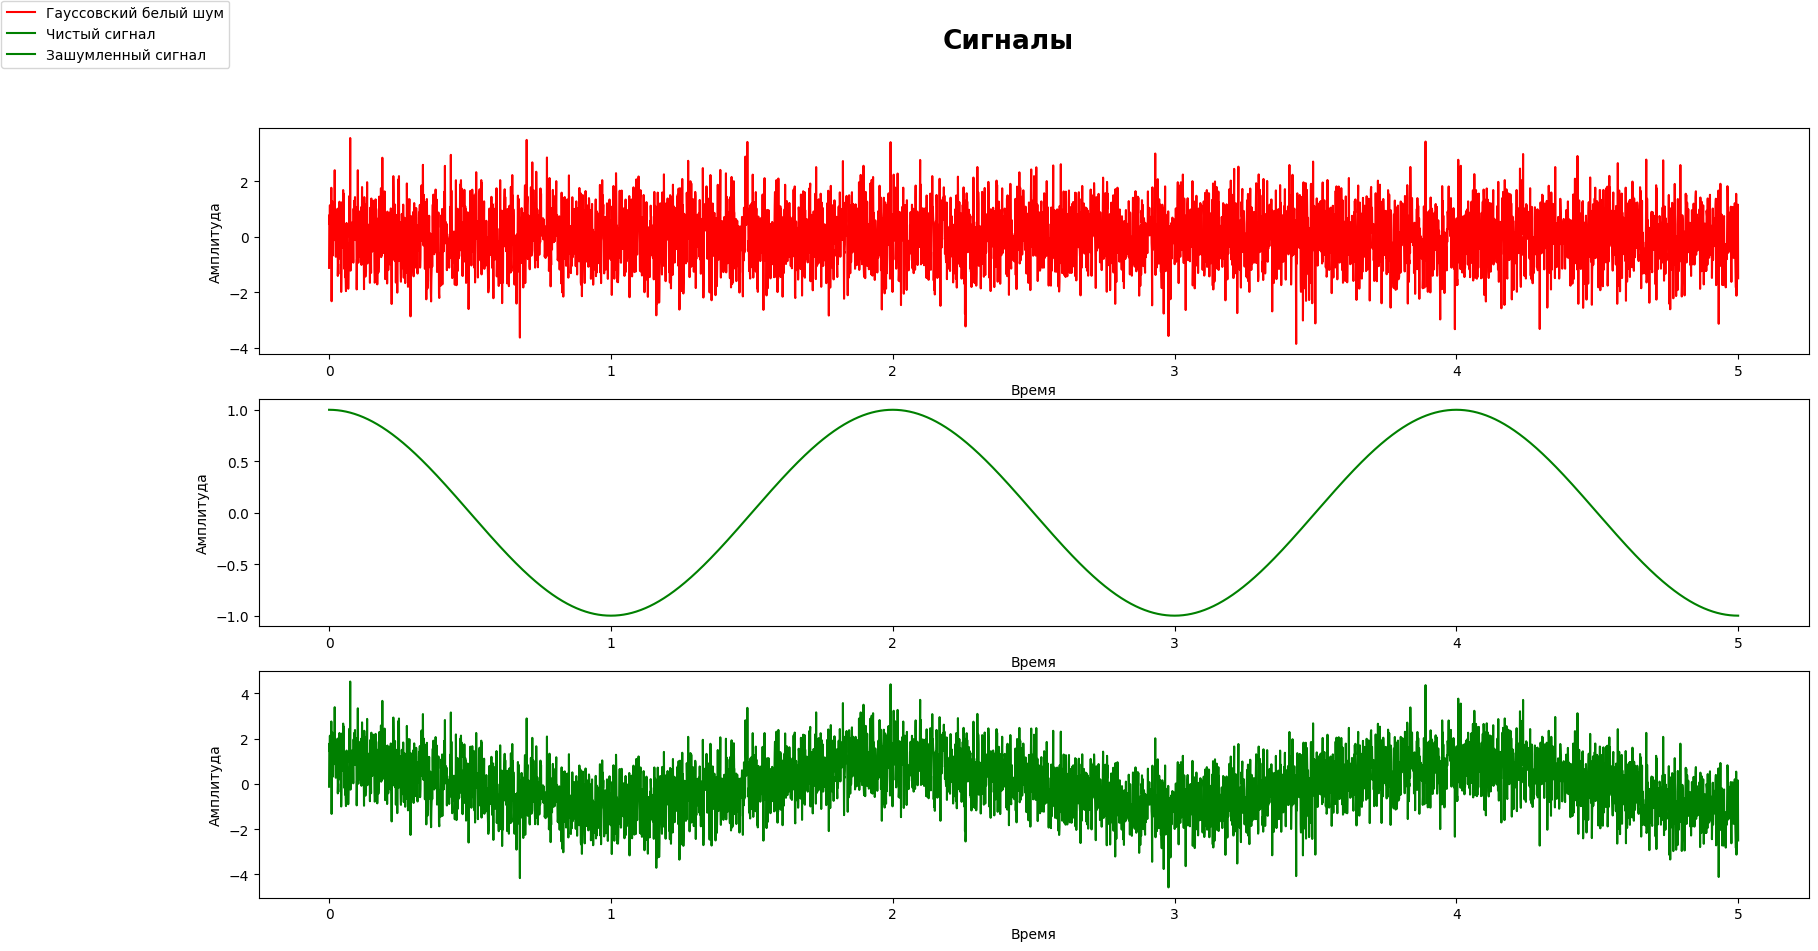

In [58]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)